In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
im1 = cv2.imread("./im1.jpeg")
im2 = cv2.imread("./im2.jpeg")

(-0.5, 182.5, 274.5, -0.5)

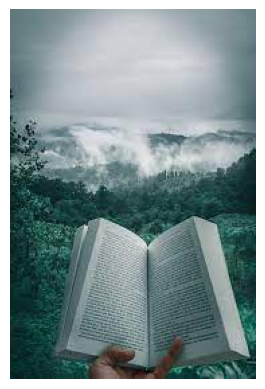

In [13]:
plt.imshow(im1[:, :, ::-1])
plt.axis("off")

(-0.5, 284.5, 176.5, -0.5)

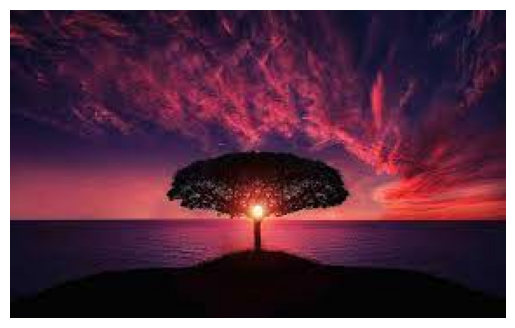

In [15]:
plt.imshow(im2[:, :, ::-1])
plt.axis("off")

## Swap the red and blue pixels of image 1

(-0.5, 182.5, 274.5, -0.5)

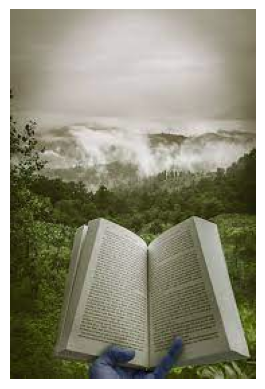

In [18]:
plt.imshow(im1)
plt.axis("off")

## Create a monochrome image (img1_green) by selecting the green channel of image 1

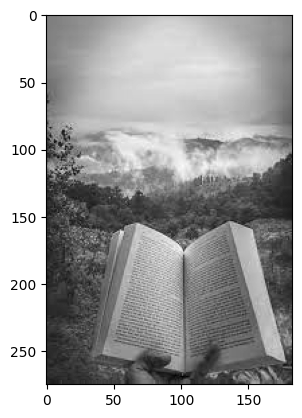

In [21]:
plt.imshow(im1[:, :, 1], cmap="gray")

## Ceate a monochrome image (img1_red) by selecting the red channel of image 1

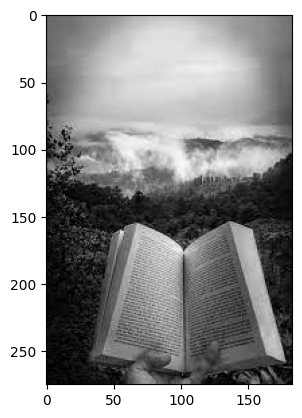

In [22]:
plt.imshow(im1[:, :, 2], cmap="gray")

## Take the inner center square region of 100x100 pixels of monochrome version of image 1 and insert them into the center of monochrome version of image 2

In [27]:
im1shape = im1.shape
im2shape = im2.shape

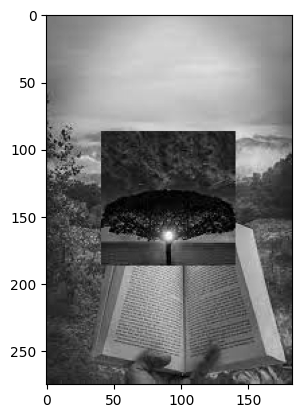

In [31]:
im_1_2_combined = im1
im_1_2_combined[int(im1shape[0]/2-50):int(im1shape[0]/2+50), int(im1shape[1]/2-50):int(im1shape[1]/2+50), 1] = im2[int(im2shape[0]/2-50):int(im2shape[0]/2+50), int(im2shape[1]/2-50):int(im2shape[1]/2+50), 1] 
plt.imshow(im_1_2_combined[:, :, 1], cmap ="gray")

## What is the min and max of the pixel values of img1_green? What is the mean? What is the standard deviation?  And how did you compute these?

In [34]:
im1_green = im1[:, :, 1]
print(f"max value: {im1_green.max()}, min value: {im1_green.min()}")

max value: 254, min value: 0


In [36]:
print(f"mean value: {im1_green.mean()}, std: {im1_green.std()}")

mean value: 112.18932935916543, std: 60.24970033006975


In [66]:
mean = sum(sum(im1_green.astype(dtype=int)))/(im1_green.shape[0]*im1_green.shape[1])  

std = math.sqrt(sum(sum((im1_green.astype(dtype=int) - mean)**2))/(im1_green.shape[0]*im1_green.shape[1]))
print(mean, std)

112.18932935916543 60.249700330069764


## Subtract the mean from all pixels, then divide by standard deviation, then multiply by 10 (if your image is 0 to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.

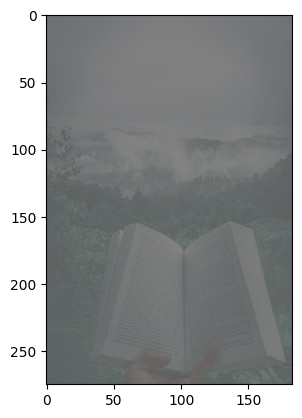

In [91]:
im1 = cv2.imread("./im1.jpeg")
im1 = ((im1 - mean)/std)*10 + mean
plt.imshow(im1.astype(np.uint8)[:, :, ::-1])

## Shift img1_green to the left by 2 pixels.

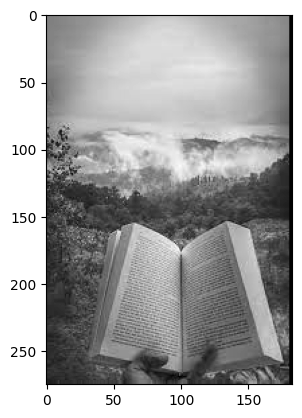

In [104]:
im1_green_shifted = cv2.imread("./im1.jpeg")[:, :, 1]

shift = 2

im1_green_shifted[:, :-shift] = im1_green_shifted[:, shift:]
im1_green_shifted[:, -shift:] = 0
plt.imshow(im1_green_shifted, cmap="gray")


## Subtract the shifted version of img1_green from the original, and save the difference image.

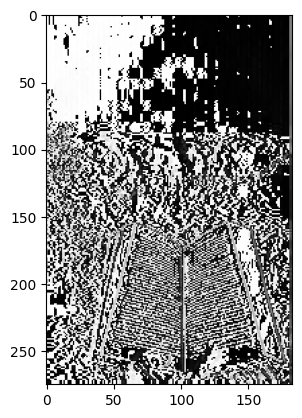

In [113]:
im1_green = cv2.imread("./im1.jpeg")[:, :, 1]
im1_original_green_difference = im1_green - im1_green_shifted
plt.imshow(im1_original_green_difference, cmap="gray")

## Take the original colored image (image 1) and start adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.  

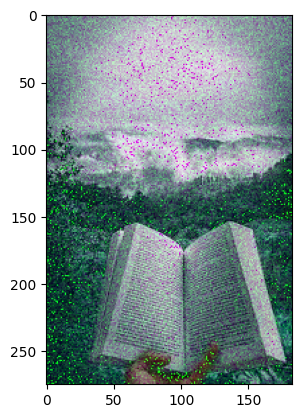

In [129]:
im1=cv2.imread("./im1.jpeg")
im1[:, :, 1] = im1[:, :, 1] + np.random.randn(im1.shape[0], im1.shape[1]) * 30
plt.imshow(im1.astype("uint8")[:, :, ::-1])

## Now, instead add that amount of noise to the blue channel.

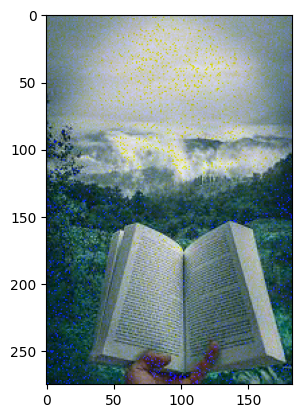

In [130]:
im1=cv2.imread("./im1.jpeg")
im1[:, :, 0] = im1[:, :, 0] + np.random.randn(im1.shape[0], im1.shape[1]) * 30
plt.imshow(im1.astype("uint8")[:, :, ::-1])